In [83]:
#Equação de Schrondinger para duas partículas

#Danilo Lessa Bernardineli
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ
from ipywidgets import widgets

In [118]:
### Parâmetros das condições iniciais ###
#Particula 1
params_x = {"x_c": -0.2, "s": 0.05, "k_0": 30.0, "m": 1.0}
mx = 1.0

#Particula 2
params_y = {"x_c": 0.2, "s": 0.05, "k_0": -30.0, "m": 2.0}
my = 2.0

#Parâmetros do potencial barreira
V_0 = 1.0
alfa = 1.0

def V(r):
    return 0
    #return V_0 * np.exp(-alfa * r)

In [119]:
### Parâmetros de simulação ###

#Intervalo no eixo x
x_i = -1
x_f = 1

#Intervalo temporal
t_0 = 0
t_f = 0.001

#Passos
dt = 0.0001
r = 0.075
dx = np.sqrt(dt / (2 * r))
dx2 = 2 * dx ** 2

#Tamanho das matrizes de simulação
Nt = int((t_f - t_0) / dt)
Nx = int((x_f - x_i) / dx)

#Discretização do espaço contínuo
Td = np.arange(Nt, dtype=np.int)
Xd = np.arange(Nx, dtype=np.int)
e = 1e-7
Yd = np.arange(Nx, dtype=np.int)

#Representação no espaço contínuo
T = Td * dt
X = (Xd * dx) + x_i
Y = (Yd * dx) + x_i

In [134]:
def waveFunction(x, params):
    """Initial time-indepedent wavefunction.
    Keyword arguments:
    x -- Wavefunction on the x position
    """
    x_c = params["x_c"]
    k_0 = params["k_0"]
    s = params["s"]
    
    expoent = (-1/2) * (((x - x_c) / s)) ** 2
    return np.exp(1j * k_0 * x) * np.sqrt(np.exp(expoent) / (s * np.sqrt(2 * np.pi)))


def der_A(A, i):
    if (i == 0) | (i == Nx-1):
        return 0
    return (A[i+1] - 2 * A[i] + A[i-i]) / dx2

def der_X(Wk, i, j):
    return der_A(Wk[:, j], i)

def der_Y(Wk, i, j):
    return der_A(Wk[i, :], j)

def der_RK(Ak, i, j, sign):
    x = X[i]
    y = Y[j]
    r = np.abs(x - y)
    
    Axx = der_X(Ak, i, j)
    Ayy = der_Y(Ak, i, j)
    VA = V(r) * Ak[i, j]

    return sign * ((Axx / mx + Ayy / my) / 2 - VA)
    
def der_W(Wk, i, j):
    R = np.real(Wk)
    I = np.imag(Wk)
    return der_RK(I, i, j, -1) + 1j * der_RK(R, i, j, 1)

In [153]:
W = np.zeros((Nx, Nx, Nt), dtype=np.complex_)
Wabs = np.zeros((Nx, Nx, Nt))
Ax = np.zeros((Nx, Nt))
Ay = np.zeros((Nx, Nt))
H = np.zeros((Nx, Nx, Nt), dtype=np.complex_)
N = np.zeros(Nt)

In [154]:
for k in Td:
    t = T[k]
    
    if t == 0:
        for i in Xd:
            x = X[i]
            for j in Yd:
                y = Y[j]
                W[i, j, 0] = waveFunction(x, params_x) + waveFunction(y, params_y)
    else:
        Wk = W[:, :, k-1]
        half_Wk = np.zeros((Nx, Nx), dtype=np.complex_)

        #Primeira parte do RK2
        for i in Xd:
            x = X[i]        
            for j in Yd:
                y = Y[j]

                #
                Wijk = W[i, j, k-1]

                #Derivada total
                k1 = der_W(Wk, i, j) * dt

                #Aproximação
                half_Wk[i, j] = Wijk + k1 / 2


        #Segunda parte do RK2
        for i in Xd:
            x = X[i]        
            for j in Yd:
                y = Y[j]

                Wijk = half_Wk[i, j]

                #Derivada no meio passo
                k2 = der_W(Wk, i, j) * dt

                #Aproximação final
                W[i, j, k] = Wijk + k2
    for i in Xd:
        for j in Yd:
            Wabs[i, j, k] = np.abs(W[i, j, k])
            Ax[i, k] += Wabs[i, j, k] ** 2 * dx
            Ay[j, k] += Wabs[i, j, k] ** 2 * dx
            
    N[k] = np.sum(np.abs(W[:, :, k]))
    W[:, :, k] /= N[k]

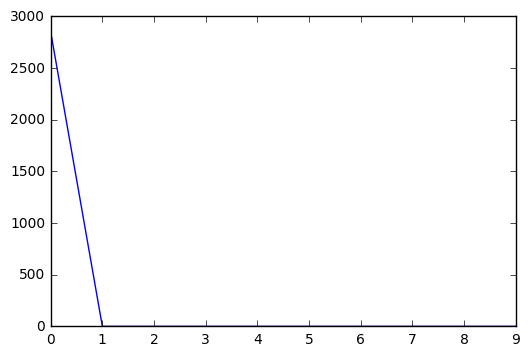

In [155]:
plt.plot(Td, N)
plt.show()

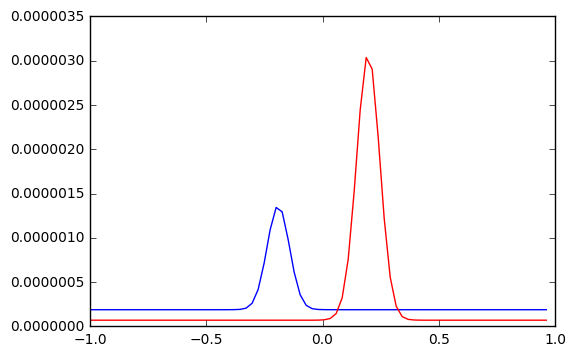

In [156]:
k = 9
plt.plot(X, Ax[:, k], 'b')
plt.plot(X, Ay[:, k], 'r')
plt.show()

In [144]:
N[2]

100225888383.27519